# Electrical Fault detection

We have to predict faults in a power system.

# Dataset Desciption

The dataset contains one file 

detect_dataset.csv

shape of the dataset is (12001, 9)

# Columns in dataset

there are seven columns

'Output (S)',

'Ia',

'Ib',

'Ic',

'Va', 

'Vb', 

'Vc', 

'Unnamed: 7',

'Unnamed: 8'

Outputs - 0 (No-fault) or 1(Fault is present)

In [105]:
# Importing Necessary Libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [106]:
from google.colab import files
 
 
uploaded = files.upload()


Saving detect_dataset.csv to detect_dataset (1).csv


In [107]:
# Read csv file using pandas
data=pd.read_csv('detect_dataset.csv')

In [108]:
data.head().style.background_gradient(cmap='winter')

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,nan,nan
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,nan,nan
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,nan,nan
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,nan,nan
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,nan,nan


# basic EDA

In [109]:
#check shape of the dataset
data.shape

(12001, 9)

In [110]:
# check columns of dataset
data.columns

Index(['Output (S)', 'Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [111]:
# check length of dataset
print("the dataset length :",len(data))

the dataset length : 12001


In [112]:
# Check which columns are having categorical, numerical or boolean values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


In [113]:
# For more information on the dataset like the total count in all the columns of train data
# min, max values and more information of the respective columns 
data.describe().style.background_gradient(cmap='Greens')

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,0.000000,0.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980,nan,nan
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272,nan,nan
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709,nan,nan
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951,nan,nan
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381,nan,nan
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681,nan,nan
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243,nan,nan


In [114]:
# Check for missing values in all the columnns of the dataset
data.isna().sum()

Output (S)        0
Ia                0
Ib                0
Ic                0
Va                0
Vb                0
Vc                0
Unnamed: 7    12001
Unnamed: 8    12001
dtype: int64

In [115]:
# loop through datatset to find count of unique values of each column
data.nunique()

Output (S)        2
Ia            12001
Ib            12001
Ic            12001
Va            11996
Vb            11813
Vc            11987
Unnamed: 7        0
Unnamed: 8        0
dtype: int64

In [116]:
# drop 'Unnamed: 7','Unnamed: 8'
data.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace=True)

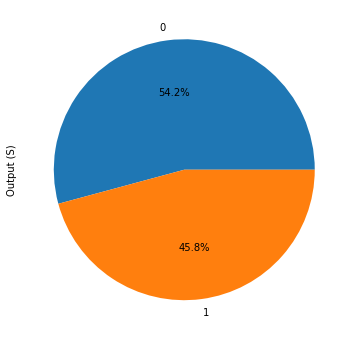

In [117]:
# check total number of fault and no-fault instances
data['Output (S)'].value_counts().plot(kind='pie',figsize =(18,6), autopct = '%1.1f%%')

# Correlation Matrix

## Why?
#### A correlation matrix is a table showing correlation coefficients between variables.

### There are three broad reasons for computing a correlation matrix:

  1. To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
  2. To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
  3. As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

In [118]:
# Using pandas
data.corr().style.background_gradient(cmap='GnBu_r')

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
Output (S),1.000000,0.039408,-0.134028,0.120044,-0.035377,0.012206,0.022570
Ia,0.039408,1.000000,-0.375477,-0.275694,0.032598,-0.158207,0.129686
Ib,-0.134028,-0.375477,1.000000,-0.530187,-0.027052,0.032248,-0.006205
Ic,0.120044,-0.275694,-0.530187,1.000000,-0.001813,-0.096194,0.100298
Va,-0.035377,0.032598,-0.027052,-0.001813,1.000000,-0.507928,-0.471163
Vb,0.012206,-0.158207,0.032248,-0.096194,-0.507928,1.000000,-0.520478
Vc,0.022570,0.129686,-0.006205,0.100298,-0.471163,-0.520478,1.000000


# Histogram

1. A histogram is an approximate representation of the distribution of numerical data.

2. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval.

3. The words used to describe the patterns in a histogram are: "symmetric", "skewed left" or "right", "unimodal", "bimodal" or "multimodal".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6e1c77bd50>,
      dtype=object)

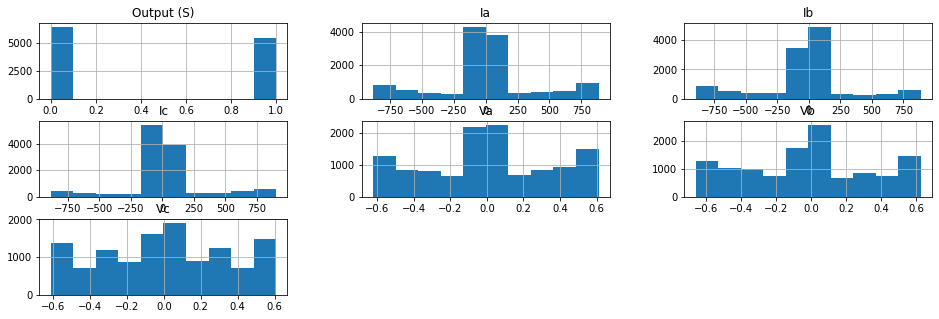

In [119]:
# Histogram using pandas 
data.hist(figsize=(16,5))

### Count plot

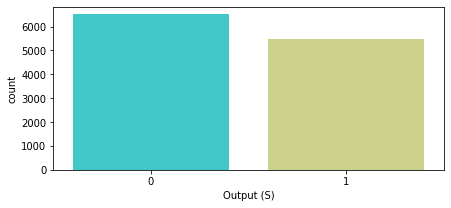

In [120]:
# count plot of Output (S) column
plt.figure(figsize=(7,3))
sns.countplot(data['Output (S)'],palette='rainbow')

# Box plot


A boxplot is a standardized way of displaying the dataset based on a five-number summary:

    1. Minimum (Q0 or 0th percentile): the lowest data point excluding any outliers.

    2. Maximum (Q4 or 100th percentile): the largest data point excluding any outliers.

    3. Median (Q2 or 50th percentile): the middle value of the dataset.

    4. First quartile (Q1 or 25th percentile): also known as the lower quartile qn(0.25), is the median of the lower half of the dataset.

    5. Third quartile (Q3 or 75th percentile): also known as the upper quartile qn(0.75), is the median of the upper half of the dataset

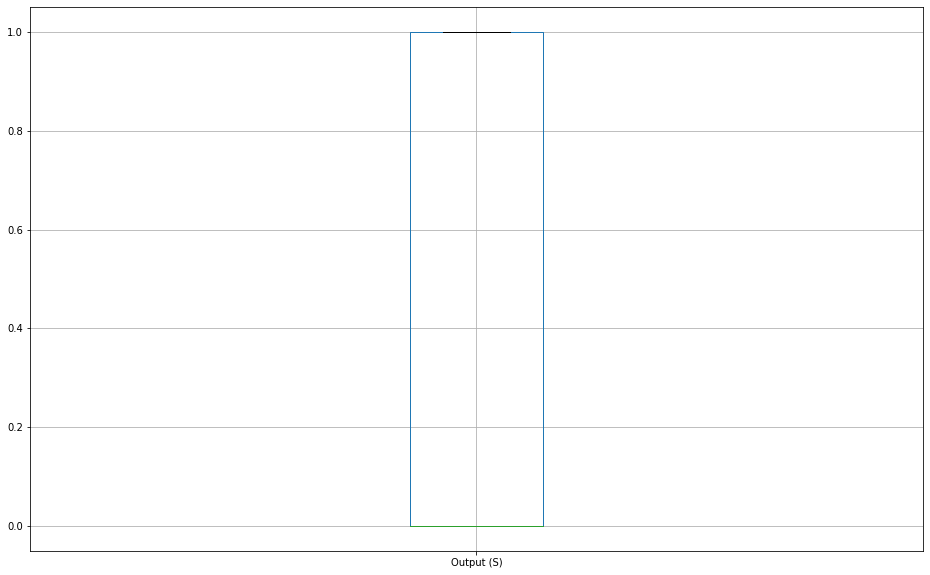

In [121]:
# box plot using pandas 
# box plot for Output (S) column 

data.boxplot(column='Output (S)',figsize=(16,10))

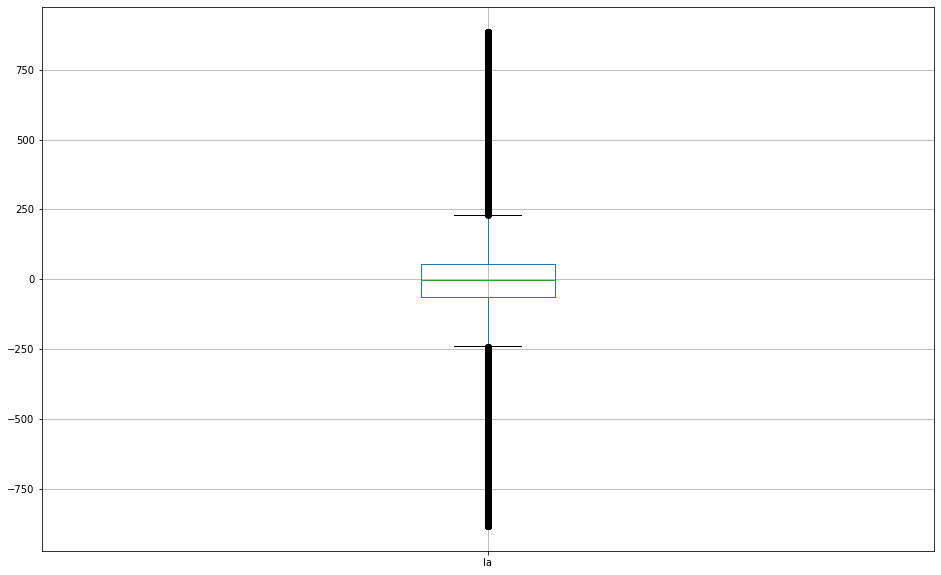

In [122]:
# box plot using pandas 
# box plot for Ia column 

data.boxplot(column='Ia',figsize=(16,10))

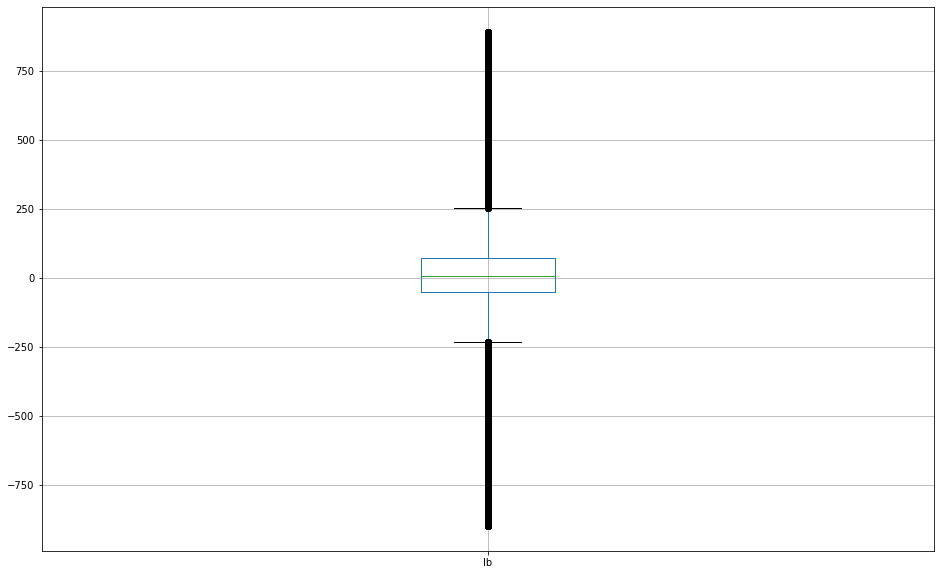

In [123]:
# box plot using pandas 
# box plot for Ib column 


data.boxplot(column='Ib',figsize=(16,10))

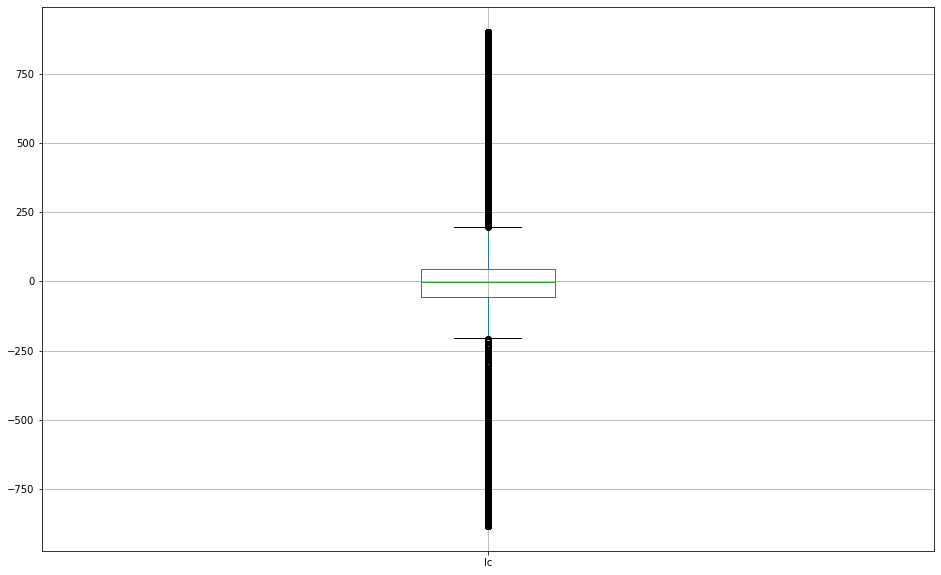

In [124]:
# box plot using pandas 
# box plot for Ic column 

data.boxplot(column='Ic',figsize=(16,10))

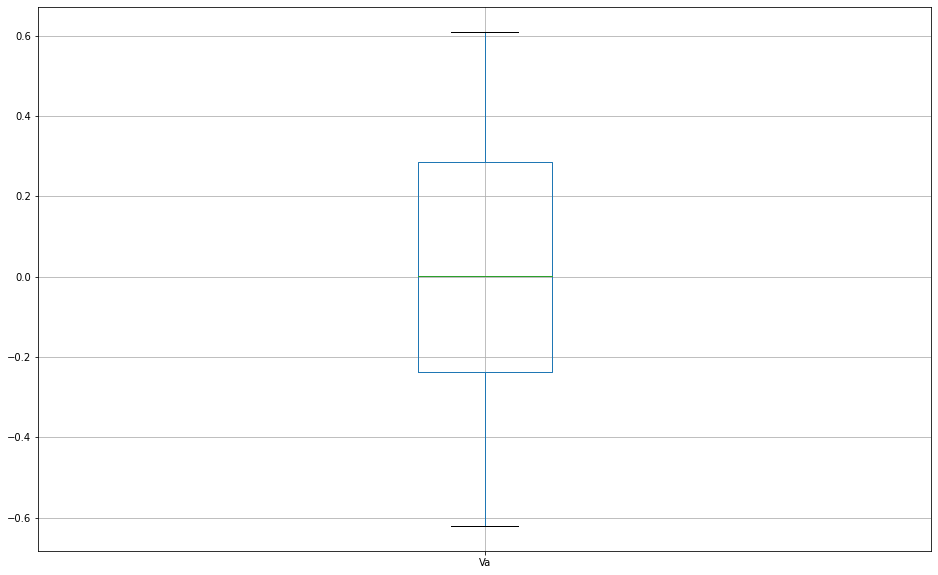

In [125]:
# box plot using pandas 
# box plot for Va column 


data.boxplot(column='Va',figsize=(16,10))

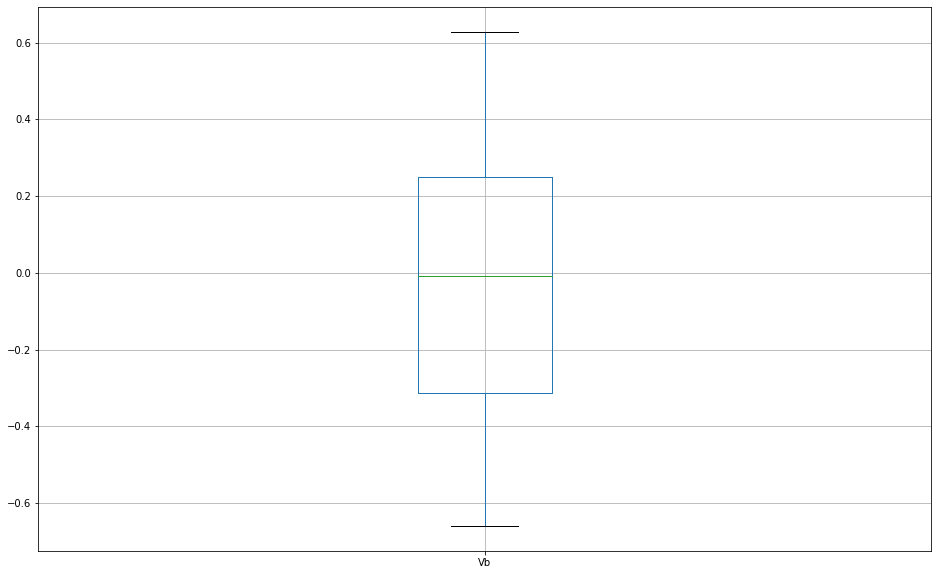

In [126]:
# box plot using pandas 
# box plot for Vb column 


data.boxplot(column='Vb',figsize=(16,10))

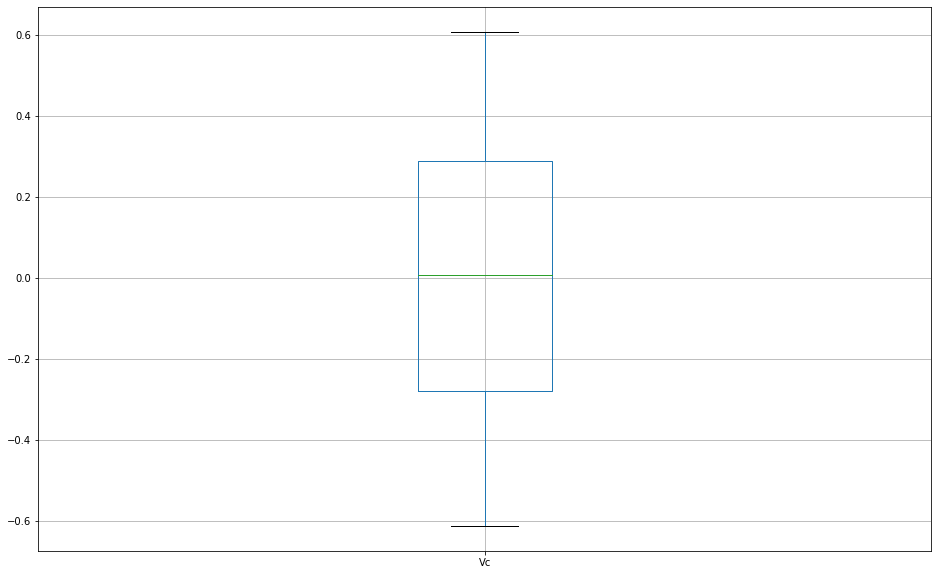

In [127]:
# box plot using pandas 
# box plot for Vc column 

data.boxplot(column='Vc',figsize=(16,10))


Dataset is balanced and not skewed in nature

# Dendrogram

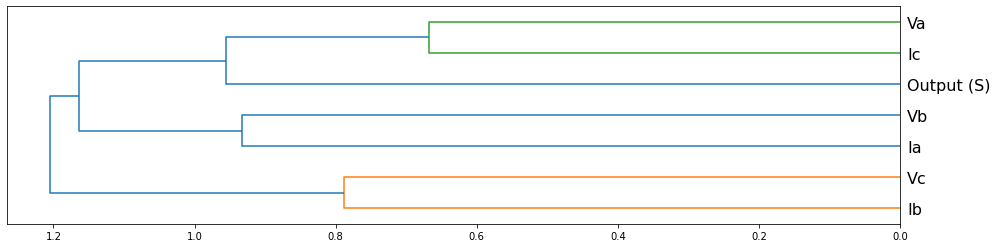

In [128]:
# Plot a Dendrogram on the columns of the dataset

# droping the NaN values

X=data.dropna()
import scipy 
from scipy.cluster import hierarchy as hc
corr=np.round(scipy.stats.spearmanr(X).correlation,4)
corr_distance=hc.distance.squareform(1-corr)
z=hc.linkage(corr_distance,method='average')
fig=plt.figure(figsize=(16,4))
dendrogram=hc.dendrogram(z,labels=X.columns,orientation='left',leaf_font_size=16)
plt.show()

# Preprocessing, Modeling and prediction on test data

In [129]:
## Split the labels and the target
X=data.drop(['Output (S)'],axis=1)
y=data['Output (S)']
#check the shape 
print(X.shape)

(12001, 6)


In [130]:
# import train test split
from sklearn.model_selection import train_test_split
# Split into training (80%) and testing set (20%)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# check shape of X_train and y_train
print(X_train.shape)
print(y_train.shape)
# check shape of X_test and y_test
print(X_test.shape)
print(y_test.shape)

(9600, 6)
(9600,)
(2401, 6)
(2401,)


### Scaling

In [131]:
# import min max scalar

def sclaed_score(df,col):
# Instantiate t
    from sklearn.preprocessing import MinMaxScaler

# fit on train data
    scaler=MinMaxScaler()
    df[col]=scaler.fit_transfom(df[col])
# fit on test data
    return df

In [132]:
# Visualize importance of all the features in the dataset for the prediction
def feature_imp(feature_importance,feature_train_df):


    # creating dataframe for feature name and feature importance
      feature_imp_df=pd.DataFrame()
      _df=pd.DataFrame()
      _df['feature_imp'] = feature_importance
      _df['column'] = feature_train_df.columns
      feature_imp_df=pd.concat([feature_imp_df,_df],axis=0,ignore_index=True)

    # grouping all data and sorting in descending order
      descend_ordr = feature_imp_df.groupby('column').sum()[['feature_imp']].sort_values('feature_imp',ascending=False).index[:50]
    
    # ploting feature importance data using boxenplot
    # return fig, ax
      fig,ax = plt.subplots(figsize=(8,max(6,len(descend_ordr)*.25)))
    # Visualize importance of all the features in the dataset for the prediction
      sns.boxenplot(data=feature_imp_df,x='feature_imp',y='column',order=descend_ordr,ax=ax,palette='viridis',orient='h')
      ax.tick_params(axis='x',rotation=90)
      ax.set_title('Importance')
      ax.grid()
      fig.tight_layout()
      return fig,ax 



   





In [133]:

# import accuracy_score, precision_score, precision_score, confusion_matrix
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix


## LogisticRegression

The accuracy_score 0.7371928363182008
The precision_score 1.0
The confusion_matrix [[1306    0]
 [ 631  464]]
CPU times: user 300 ms, sys: 264 ms, total: 564 ms
Wall time: 327 ms


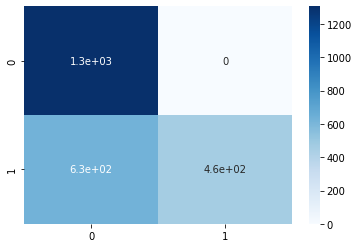

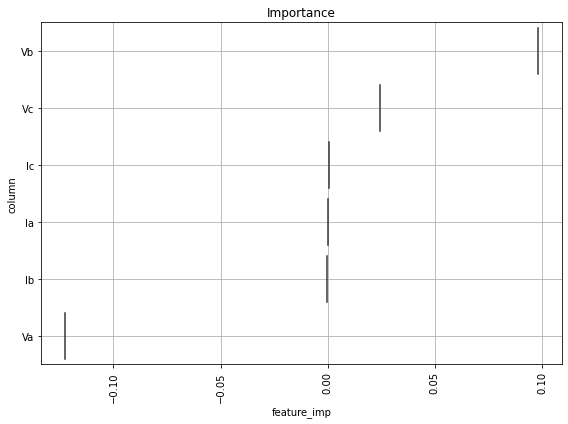

In [134]:
%%time
# Fit a logistic Regression model to the train dataset

# Import logisticRegressor
from sklearn.linear_model import LogisticRegression


# Instantiate the model
log_class=LogisticRegression()
# fitting the model on train data

log_class.fit(X_train,y_train)
#predict on test data
prediction=log_class.predict(X_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))
# visualizing importance of features

fig,ax=feature_imp(log_class.coef_[0],X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))

## RandomForestClassifier

The accuracy_score 0.9979175343606831
The precision_score 0.9963570127504554
The confusion_matrix [[1302    4]
 [   1 1094]]
CPU times: user 1.56 s, sys: 93.6 ms, total: 1.65 s
Wall time: 1.57 s


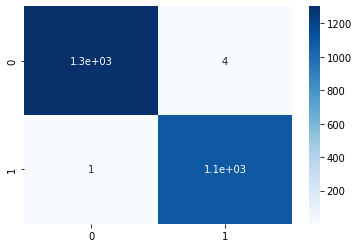

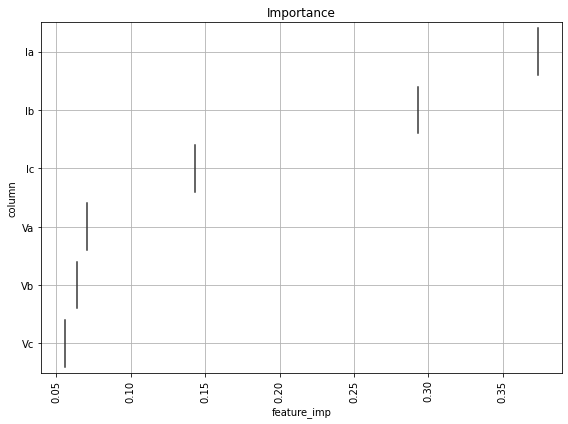

In [135]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model

random_forest=RandomForestClassifier()
# fitting the model on train data

random_forest.fit(X_train,y_train)
# predict on test data

prediction=random_forest.predict(X_test)
# print accuracy_score,precision_score,precision_score,confusion_matrix

print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')

# visualizing importance of features

fig,ax=feature_imp(random_forest.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))




## DecisionTreeClassifier

The accuracy_score 0.9954185755935027
The precision_score 0.9936247723132969
The confusion_matrix [[1299    7]
 [   4 1091]]
CPU times: user 246 ms, sys: 108 ms, total: 354 ms
Wall time: 240 ms


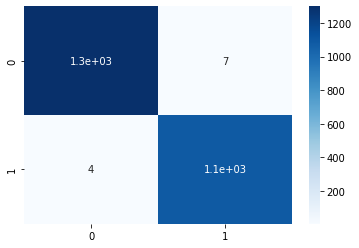

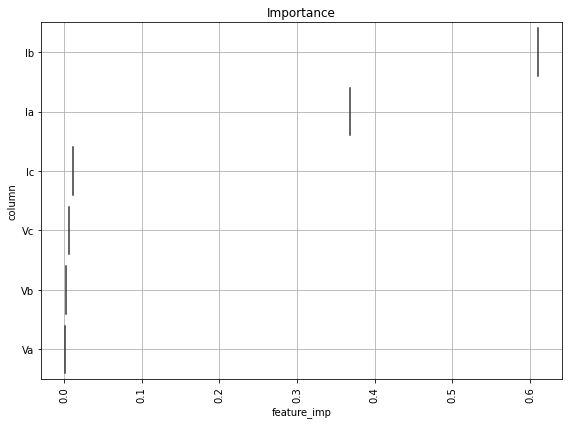

In [136]:
%%time
# Fit a DecisionTreeClassifier model to the train dataset

#import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate the model

decison_tree=DecisionTreeClassifier()
# fitting the model on train data
decison_tree.fit(X_train,y_train)

# predict on test data
prediction=decison_tree.predict(X_test)

# print accuracy_score,precision_score,precision_score,confusion_matrix
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))



# visualizing importance of features


fig,ax=feature_imp(decison_tree.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))





## GradientBoostingClassifier

The accuracy_score 0.9966680549770929
The precision_score 0.9972552607502287
The confusion_matrix [[1303    3]
 [   5 1090]]
CPU times: user 2.49 s, sys: 103 ms, total: 2.59 s
Wall time: 2.48 s


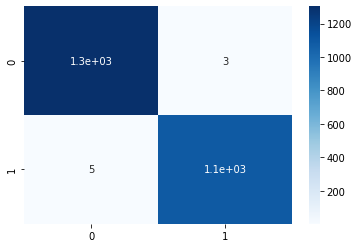

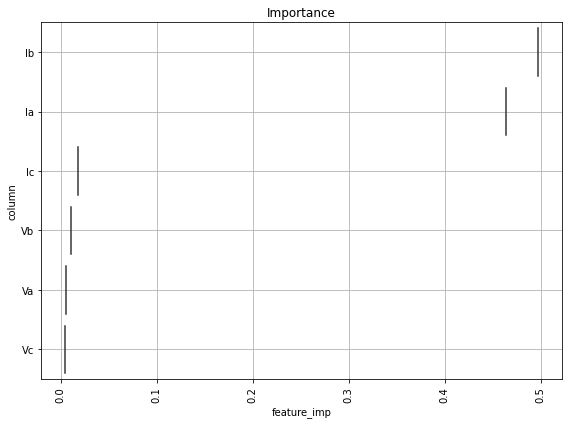

In [137]:
%%time
# Fit a Gradient Boosting Classifier model to the train dataset

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Instantiate the model
gradient=GradientBoostingClassifier()

# fitting the model on train data

gradient.fit(X_train,y_train)
# predict on test data
prediction=gradient.predict(X_test)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
# print accuracy_score,precision_score,precision_score,confusion_matrix

print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))


# visualizing importance of features


fig,ax=feature_imp(gradient.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))



## Hyper parameter tunning

A hyperparameter is a parameter whose value is set before the learning process begins.

Hyperparameters tuning is crucial as they control the overall behavior of a machine learning model.

Every machine learning models will have different hyperparameters that can be set.

###RandomizedSearchCV

RandomizedSearchCV is very useful when we have many parameters to try and the training time is very long.

1. The first step is to write the parameters that we want to consider
2. From these parameters select the best ones.(which are printed in output)

In [138]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV

def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  # Fit the random search model
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1)
  
  #fit on train
  random.fit(X_train,y_train)
  # print best_params_
  print(random.best_params_)

In [139]:
%%time
# for random forest classifier
# create parameters dict for tunning
# create parameters dict for tunning
rf_para_grid = {'n_estimators': list(range(150, 301, 50)),
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(3, 10, num = 3)],
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2],
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv
random_Search(RandomForestClassifier(),X_train, y_train,param_grid=rf_para_grid)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
CPU times: user 4.56 s, sys: 125 ms, total: 4.68 s
Wall time: 1min 20s


The accuracy_score 0.9975010412328197
The precision_score 0.9963536918869644
The confusion_matrix [[1302    4]
 [   2 1093]]
CPU times: user 2.82 s, sys: 118 ms, total: 2.94 s
Wall time: 2.81 s


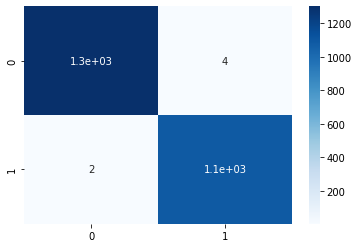

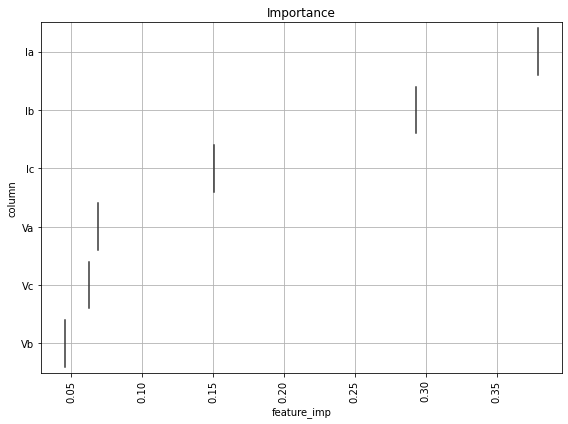

In [140]:
%%time
# Fit a RandomForestClassifier model to the train dataset

#import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate the model

random_forest=RandomForestClassifier(**{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': True})
# fitting the model on train data

random_forest.fit(X_train,y_train)
# predict on test data

prediction=random_forest.predict(X_test)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='Blues')
# print accuracy_score,precision_score,precision_score,confusion_matrix

print("The accuracy_score",accuracy_score(y_test,prediction))
print("The precision_score",precision_score(y_test,prediction))


# visualizing importance of features

fig,ax=feature_imp(random_forest.feature_importances_,X_train)
# display confusion matrix
print("The confusion_matrix",confusion_matrix(y_test,prediction))




### working with best model

In [141]:
# print Area under ROC of Model On Test Set
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,prediction))

0.9975553644227205


In [142]:
# Create a dataframe with predicted result as data using best model
data_frame=random_forest.predict(X_test)
data_1=pd.DataFrame(data_frame)


In [143]:
data_1.head()

,0
0,0
1,1
2,0
3,0
4,0


# Conclusion

According to this model, the predicted value we got, matches with the actual target values. The model is performing well.  We have performed EDA, preprocessing, build different models, visualized feature importance, did hyper parameter tunning and did prediction.

## Congratulation for completing the assignment.
You have learned a lot while doing this assignment.